# **Imputing Missing Values**

## **Mean / Median Imputation**

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

### **Load and Analyse Dataset**

In [43]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Learning Machine Learning/titanic_toy.csv')

In [44]:
df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


### **Perform Train Test Split**

In [46]:
X = df.drop(columns = ['Survived'])
y = df['Survived']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [48]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [49]:
X_train.isnull().mean()

,0
Age,0.207865
Fare,0.050562
Family,0.000000


### **Calculate Mean and Median**

In [50]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

### **Create new column & impute missing values**

In [51]:
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)
X_train['Age_median'] = X_train['Age'].fillna(median_age)

X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)
X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)

In [52]:
X_train.sample(10)

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
88,23.0,263.000,5,23.000000,23.00,263.000000,263.0000
55,NaN,35.500,0,29.785904,28.75,35.500000,35.5000
807,18.0,7.775,0,18.000000,18.00,7.775000,7.7750
120,21.0,73.500,2,21.000000,21.00,73.500000,73.5000
341,24.0,263.000,5,24.000000,24.00,263.000000,263.0000
2,26.0,7.925,0,26.000000,26.00,7.925000,7.9250
864,24.0,13.000,0,24.000000,24.00,13.000000,13.0000
446,13.0,19.500,1,13.000000,13.00,19.500000,19.5000
392,28.0,7.925,2,28.000000,28.00,7.925000,7.9250
194,44.0,NaN,0,44.000000,44.00,32.617597,14.4583


### **Review Variance**

In [53]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variance:  204.3495133904614
Age Variance after median imputation:  161.9895663346054
Age Variance after mean imputation:  161.81262452718673
Original Fare variable variance:  2448.197913706318
Fare Variance after median imputation:  2340.0910219753637
Fare Variance after mean imputation:  2324.2385256705547


### **Changes in Distribution in Age**

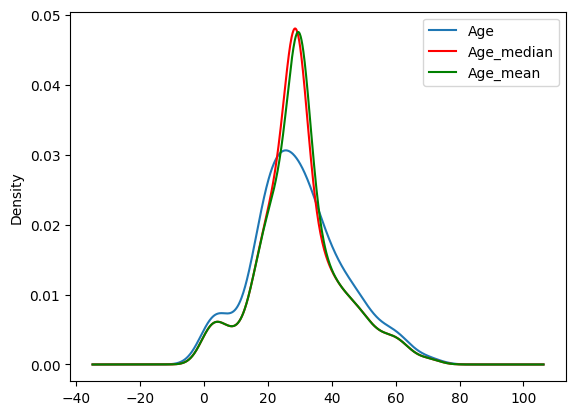

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111)
# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)
# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')
# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')
# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### **Changes in Distribution in Fare**

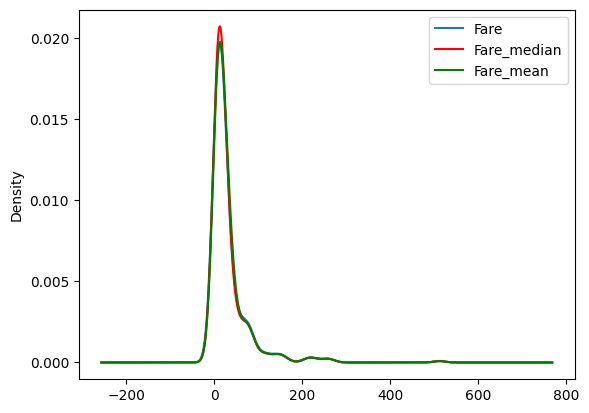

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111)
# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)
# variable imputed with the median

X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')
# variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')
# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### **Check Covariance**

In [56]:
X_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,66.665205,64.858859
Fare,70.719262,2448.197914,17.258917,55.603719,57.957599,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.146106,-5.112563,16.385048,16.476305
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,52.788341,51.358000
Age_median,204.349513,57.957599,-5.112563,161.812625,161.989566,55.023037,53.553455
Fare_mean,66.665205,2448.197914,16.385048,52.788341,55.023037,2324.238526,2324.238526
Fare_median,64.858859,2448.197914,16.476305,51.358000,53.553455,2324.238526,2340.091022


### **Check Correlation**

In [57]:
X_train.corr()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.090156,0.087356
Fare,0.092644,1.000000,0.208268,0.088069,0.091757,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.244610,-0.242883,0.205499,0.205942
Age_mean,1.000000,0.088069,-0.244610,1.000000,0.999454,0.086078,0.083461
Age_median,1.000000,0.091757,-0.242883,0.999454,1.000000,0.089673,0.086982
Fare_mean,0.090156,1.000000,0.205499,0.086078,0.089673,1.000000,0.996607
Fare_median,0.087356,1.000000,0.205942,0.083461,0.086982,0.996607,1.000000


### **Box Plot for Age**

<Axes: >

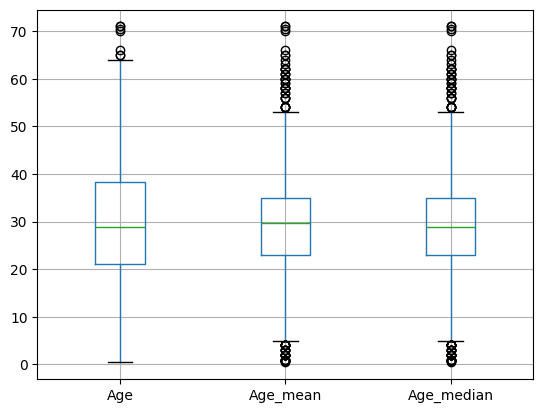

In [58]:
X_train[['Age','Age_mean','Age_median']].boxplot()

### **Box Plot for Fare**

<Axes: >

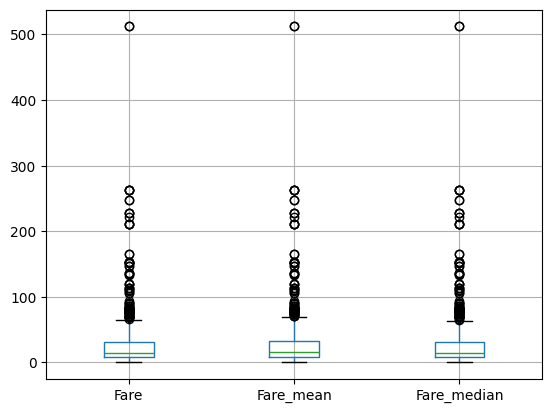

In [59]:
X_train[['Fare','Fare_mean','Fare_median']].boxplot()